In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as WNL
%matplotlib inline

In [2]:
# Defining data directory
data_dir = os.getcwd() + '/../'
# Check in contents of current dir are same as expected
os.listdir(data_dir)

['stackoverflow-data-idf.json',
 'stackoverflow-test.json',
 'TF-IDF',
 'train_corpus',
 'Unigram']

In [3]:
data = pd.read_csv(data_dir + 'train_corpus')['text']

In [4]:
data.head()

0    serialize private struct can it be do i have p...
1    how do i prevent float right content from over...
2    gradle command line i m try to run shell scrip...
3    loop variable as parameter in asynchronous fun...
4    canot get href value hi i need to valid href b...
Name: text, dtype: object

In [18]:
class vocab:
    
    def __init__(self, corpus):
        """
        Corpus : list of docs
        """
        self.dictionary = {}
        self.vocab_size = 0
        self.make_vocab(corpus)
        self.inv_dictionary = {v: k for k, v in self.dictionary.items()}
    
    def make_vocab(self,corpus):
        
        count = 0
        for doc in corpus:
            for word in doc.strip().split():
                if(word in self.dictionary.keys()):
                    pass
                else:
                    self.dictionary[word] = count
                    count += 1
        
        self.vocab_size = count
        assert(len(self.dictionary.keys()) == count), "Wrong Number of words added"
        
    def get_index(word):
        return self.dictionary[word]
    
    def get_word(index):
        return self.inv_dictionary[index]

In [19]:
myDict = vocab(list(data.iloc[0:500].values))

In [20]:
myDict.vocab_size

6882

In [8]:
class unigram:
    
    def __init__(self,vocab):
        """
        vocab : a dictionary containing all the words and corresponding indices
        k : smoothing parameter for beta matrix
        """
        self.vocab = vocab
        self.N = vocab.vocab_size
        self.probs = np.zeros((self.N))
        self.inv_vocab = {v: k for k, v in self.vocab.dictionary.items()}
        
    def train(self,corpus):
        """
        Corpus : list of docs
        """
        for doc in corpus:
            for word in doc.strip().split():
                self.probs[self.vocab.dictionary[word]] += 1
        
        self.mod_c = np.sum(self.probs)
        self.probs = (self.probs + 1)/(self.mod_c + self.N)
        
    def generate(self, num):
        txt = ''
        for n in range(num):
            txt += self.inv_vocab[np.random.choice(np.arange(self.N), p = self.probs)] + " "
        return txt
    
    
    def calc_perplexity(self, corpus):
        
        log_pd_sum = 0
        count = 0
        for document in corpus:
            for word in document.strip().split():
                if word in self.vocab.dictionary.keys():
                    index = self.vocab.dictionary[word]
                    p_w_n = self.probs[index]
                    pd = p_w_n
                else:
                    pd = 1/(self.mod_c + self.N + 1)
                    
                count += 1
                log_pd_sum += np.log(pd)
        
        perp = np.exp(-log_pd_sum/count)
            
        return perp 

In [9]:
model = unigram(myDict)

In [10]:
model.train(list(data.iloc[0:400].values))

In [11]:
model.generate(30)

'id in from reactive skip new lt data fetch to can carousel numberformat row not qsales type want asp grid on px gt dir alert getresult wlan to how username '

In [14]:
# perplexity vs number of documents

vec = []
for i in range(1,100):
    v = model.calc_perplexity(list(data.iloc[2500:2500+i].values))
    vec.append(v)

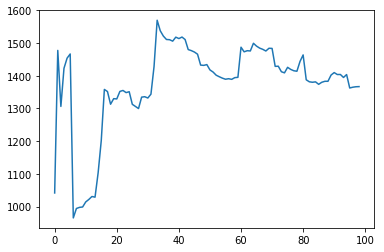

In [15]:
plt.plot(vec)